# NAive Bayes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df['Age']=df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
# Drop columns not needed for the model
df.drop(['Name', 'Ticket','Embarked','Cabin'], axis=1, inplace=True)
df=pd.get_dummies(df,columns=['Age','Fare'])

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Age_0.42,Age_0.67,Age_0.75,Age_0.83,...,Fare_153.4625,Fare_164.8667,Fare_211.3375,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292
0,1,0,3,0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,1,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,1,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [11]:
print("Accuracy Score")
print(accuracy_score(y_test,y_pred))

Accuracy Score
0.6455223880597015


In [12]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[92 65]
 [30 81]]


# KNN

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [16]:
X=df.drop('Type',axis=1)
y=df['Type']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
knn1=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)

print("Accuracy Score using euclidean")
print(accuracy_score(y_test,y_pred1))

print("Confusion Matrix using euclidean")
print(confusion_matrix(y_test,y_pred1))

Accuracy Score using euclidean
0.6307692307692307
Confusion Matrix using euclidean
[[17  4  2  0  0  0]
 [ 4 10  1  1  1  0]
 [ 3  1  1  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  2  1]
 [ 2  0  0  0  1  8]]


In [25]:
knn2=KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn2.fit(X_train,y_train)
y_pred2=knn2.predict(X_test)

print("Accuracy Score using manhattan")
print(accuracy_score(y_test,y_pred2))


print("Confusion Matrix using manhattan")
print(confusion_matrix(y_test,y_pred2))

Accuracy Score using manhattan
0.6615384615384615
Confusion Matrix using manhattan
[[17  4  2  0  0  0]
 [ 3 11  1  0  2  0]
 [ 3  1  1  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  1  9]]


# Decision Tree

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(r"weather_forecast.csv")
df.head()




,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [27]:
X = pd.get_dummies(df.drop('Play', axis=1), drop_first=True)
y = df['Play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_id3.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', random_state=42)

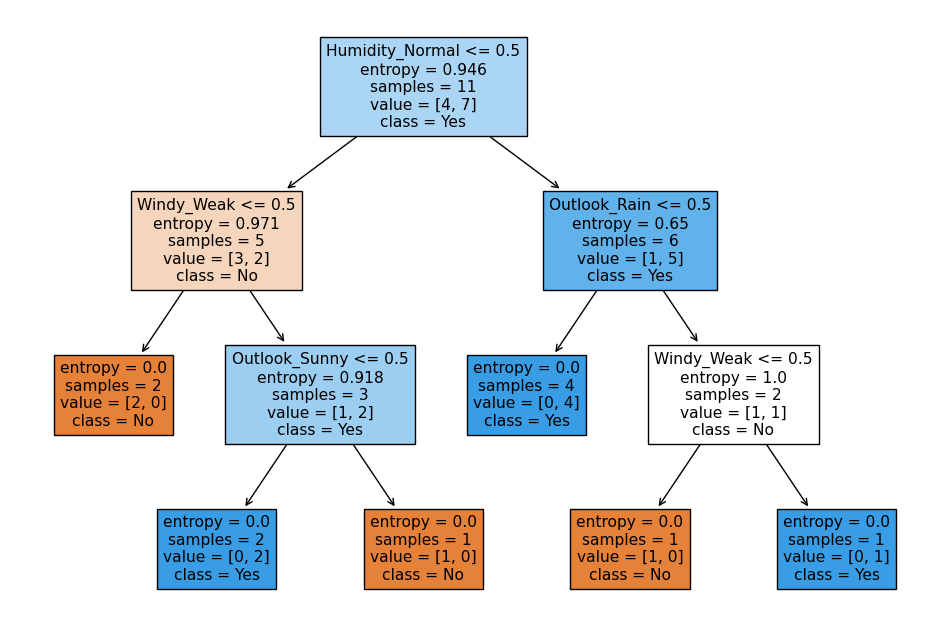

In [30]:
plt.figure(figsize=(12, 8))
plot_tree(clf_id3, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.show()



In [31]:
y_pred_id3 = clf_id3.predict(X_test)
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
report_id3 = classification_report(y_test, y_pred_id3)

print("ID3 Algorithm Results:")
print(f"Accuracy: {accuracy_id3}")
print(f"Classification Report:\n{report_id3}")

cv_scores_id3 = cross_val_score(clf_id3, X, y, cv=5)
print("Cross-Validation Scores (ID3):", cv_scores_id3)
print("Mean CV Accuracy (ID3):", cv_scores_id3.mean())

ID3 Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores (ID3): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (ID3): 0.7333333333333333


# K means


Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


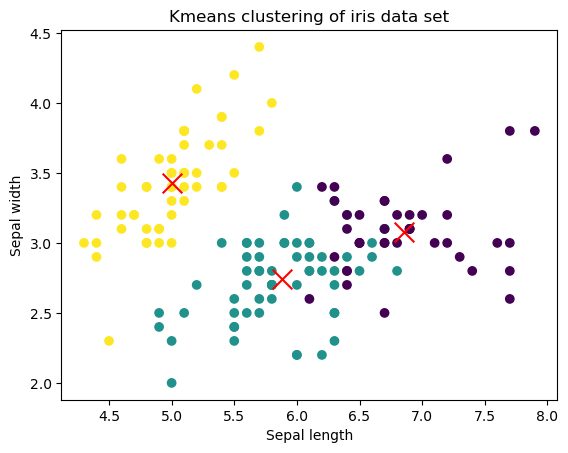

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def kmeans(X,K,max_iters=100):
    centroids=X[:K]

    for _ in range(max_iters):
        expand_x=X[:,np.newaxis]
        eucld_dis=np.linalg.norm(expand_x-centroids,axis=2)
        labels=np.argmin(eucld_dis,axis=1)

        new_centroids=np.array([X[labels==k].mean(axis=0) for k in range(K)])

        if np.all(centroids==new_centroids):
            break
        centroids=new_centroids

    return labels,centroids

X=load_iris().data
K=3
labels,centroids=kmeans(X,K)
print("Labels:",labels)
print("Centroids:",centroids)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=200)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Kmeans clustering of iris data set')
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [40]:
def kmeans(X,K,max_itr=100):
    centroids=X[:K]
    
    for _ in range(max_itr):
        expand_x=X[:,np.newaxis]
        eucl_dis=np.linalg.norm(expand_x-centroids,axis=2)
        labels=np.argmin(eucl_dis,axis=1)
        
        new_centroids=np.array([X[labels==k].mean(axis=0) for k in range(K)])
        
        if np.all(new_centroids==centroids):
            break
        centroids=new_centroids
    return labels,centroids

In [41]:
X=load_iris().data
K=3
labels,centroids=kmeans(X,K)
print("Labels:",labels)
print("Centroids:",centroids)


Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


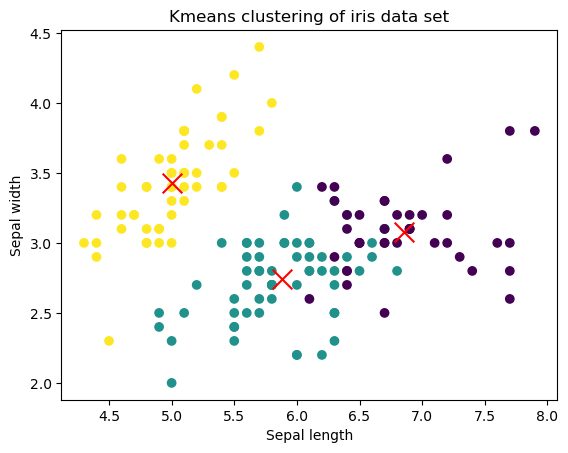

In [43]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=200)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Kmeans clustering of iris data set')
plt.show()

# agglometrive

Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


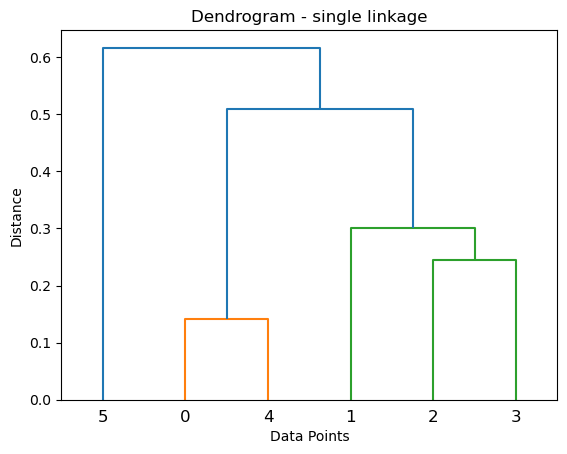

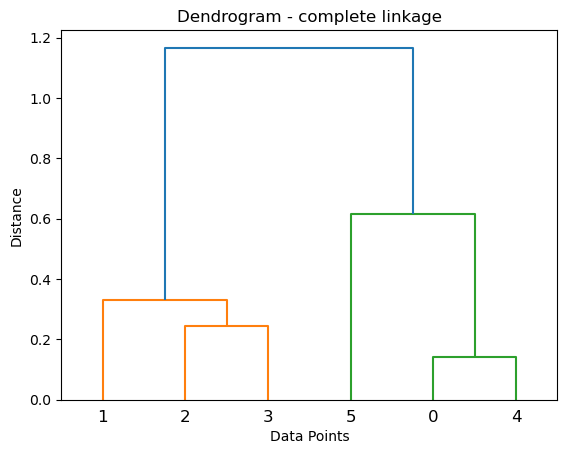

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data[:6]

def proximity_matrix(data):
  n = data.shape[0]
  proximity_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i+1, n):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
        proximity_matrix[j, i] = proximity_matrix[i, j]
  return proximity_matrix

def plot_dendrogram(data, method):
  linkage_matrix = linkage(data, method=method)
  dendrogram(linkage_matrix)
  plt.title(f'Dendrogram - {method} linkage')
  plt.xlabel('Data Points')
  plt.ylabel('Distance')
  plt.show()

# Calculate the proximity matrix
print("Proximity matrix:")
print(proximity_matrix(data))

# Plot the dendrogram using single-linkage
plot_dendrogram(data, 'single')

# Plot the dendrogram using complete-linkage
plot_dendrogram(data, 'complete')

# PCA and LDA

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


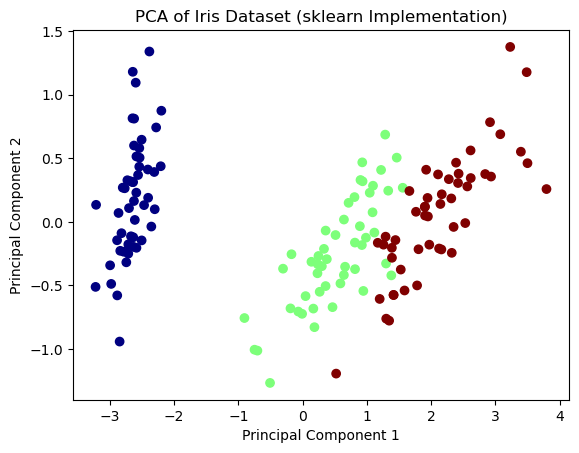

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform PCA using sklearn
pca = SklearnPCA(n_components=2)
X_projected = pca.fit_transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (sklearn Implementation)")
plt.show()



Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


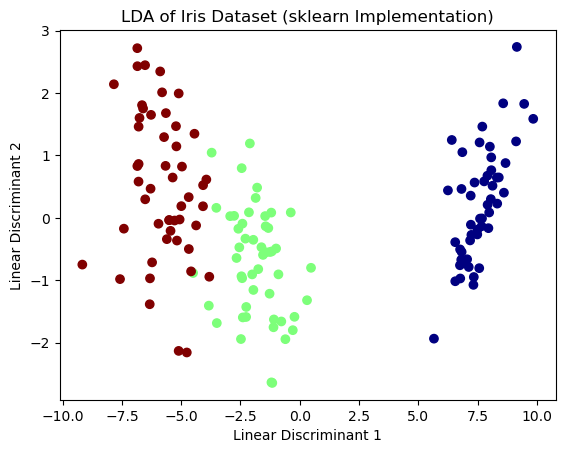

In [46]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform LDA using sklearn
lda = LinearDiscriminantAnalysis(n_components=2)
X_projected = lda.fit_transform(X, y)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (sklearn Implementation)")
plt.show()

# Single layer Perceptron

In [47]:
import numpy as np

def step_fxn(x):
    return np.where(x>=0,1,0)

x_and=np.array([[0,0],[0,1],[1,0],[1,1]])
y_and=np.array([[0],[0],[0],[1]])

x_or=np.array([[0,0],[0,1],[1,0],[1,1]])
y_or=np.array([[0],[1],[1],[1]])


class Perceptron:
    def __init__(self,ip_size):
        self.weights=np.zeros((ip_size,1))
        self.bias=0
        self.learning_rate=0.1
        self.epochs=1000
    def train(self,x,y):
        for _ in range(self.epochs):
            for inputs,labels in zip(x,y):
                inputs=inputs.reshape(-1,1)
                linear_op=np.dot(inputs.T,self.weights)+self.bias
                prediction=step_fxn(linear_op)
                errors=labels-prediction
                self.weights+=self.learning_rate*errors*inputs
                self.bias+=self.learning_rate*errors
    def predict(self,x):
        linear_op=np.dot(x,self.weights)+self.bias
        return step_fxn(linear_op)

p_and=Perceptron(ip_size=2)
p_and.train(x_and,y_and)

print("AND fxn predictions:")
print(p_and.predict(x_and))

and_t_ip=np.array([[1,1]])
print("AND fxn fredictions for input [1,1]")
print(p_and.predict(and_t_ip))

p_or=Perceptron(ip_size=2)
p_and.train(x_or,y_or)

print("OR fxn predictions:")
print(p_and.predict(x_or))

or_t_ip=np.array([[0,1]])
print("OR fxn fredictions for input [0,1]")
print(p_and.predict(or_t_ip))
        
                

AND fxn predictions:
[[0]
 [0]
 [0]
 [1]]
AND fxn fredictions for input [1,1]
[[1]]
OR fxn predictions:
[[0]
 [1]
 [1]
 [1]]
OR fxn fredictions for input [0,1]
[[1]]


# Multilayer Perceptron

In [48]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([[0], [0], [1], [0]])

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.bias_output = np.random.rand(1, output_size)

    def forward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)
        self.weights_hidden_output += self.hidden.T.dot(output_delta)
        self.weights_input_hidden += X.T.dot(hidden_delta)
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

mlp_and_not = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_and_not.train(X_and_not, y_and_not, epochs=5000)

mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_xor.train(X_xor, y_xor, epochs=5000)

print("AND-NOT Function Predictions:")
print(mlp_and_not.predict(X_and_not))

print("\nXOR Function Predictions:")
print(mlp_xor.predict(X_xor))

and_not_test_input = np.array([[0, 1]])
xor_test_input = np.array([[1, 0]])

print("\nAND-NOT Function Prediction for input [0, 1]:")
print(mlp_and_not.predict(and_not_test_input))

print("\nXOR Function Prediction for input [1, 0]:")
print(mlp_xor.predict(xor_test_input))

AND-NOT Function Predictions:
[[0]
 [0]
 [1]
 [0]]

XOR Function Predictions:
[[0]
 [1]
 [1]
 [0]]

AND-NOT Function Prediction for input [0, 1]:
[[0]]

XOR Function Prediction for input [1, 0]:
[[1]]
